# Data Comparison

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from eval import *
from utils import *
import pandas as pd
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

def plot_em_all(real, fake):
    if not isinstance(fake, list):
        fake = [fake]
    for x in fake:
        if isinstance(x, dict):
            for key, value in x.items():
                plot_corr_diff(real[key], fake[key], plot_diff=True)
                plt.show()
        else:
            assert isinstance(x, pd.DataFrame)
            plot_corr_diff(real, x, plot_diff=True)
            plt.show()

def plot_stats(real, fakes, is_dict=False, which='cat'):
    if not isinstance(fakes, list):
        fakes = [fakes]
    
    for fake in fakes:
        if is_dict:
            real_df, fake_df = real[which], fake[which]
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        real_num_mean = np.log10(np.add(real_df.mean().values, 1e-5))
        fake_num_mean = np.log10(np.add(fake_df.mean().values, 1e-5))
        sns.scatterplot(x=real_num_mean, 
                        y=fake_num_mean, 
                        ax=ax[0])
        line = np.arange(min(real_num_mean + [-5]), max(real_num_mean + [10]))
        sns.lineplot(x=line, y=line, ax=ax[0])
        ax[0].set_title('Means of real and fake data')
        ax[0].set_xlabel('real data mean (log)')
        ax[0].set_ylabel('fake data mean (log)')

        real_cat_std = np.log10(np.add(real_df.std().values, 1e-5))
        fake_cat_std = np.log10(np.add(fake_df.std().values, 1e-5))
        line = np.arange(min(real_cat_std + [-5]), max(real_cat_std + [10]))
        sns.scatterplot(x=real_cat_std, 
                        y=fake_cat_std, 
                        ax=ax[1])
        sns.lineplot(x=line, y=line, ax=ax[1])
        ax[1].set_title('Stds of real and fake data')
        ax[1].set_xlabel('real data std (log)')
        ax[1].set_ylabel('fake data std (log)')
        plt.show()


In [6]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=','):
    real = pd.read_csv(path_real, sep=real_sep)
    fake = pd.read_csv(path_fake, sep=fake_sep)
    real = real.sample(len(fake))
    real = real[fake.columns]
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Original TGAN

In [ ]:
real, fake = get_data('../data/berka/berka_cat.csv', 'samples/berka_sample.csv')

In [60]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,3539283,105,28.0,15975.0,CREDIT,UNKNOWN,INTEREST_CREDITED,2183
1,261277,825,2955.0,30172.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,958
2,144261,415,1220.0,52605.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1467
3,331357,1061,262.0,31800.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,965
4,467345,1563,2105.0,43868.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2053


In [61]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
982767,1004548,3428,9300.0,23058.9,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,2103
436570,411392,1401,2463.0,43297.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1441
282519,3580871,1534,76.1,22067.6,CREDIT,UNKNOWN,INTEREST_CREDITED,1154
466387,2539729,8381,27100.0,50497.3,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1475
630606,1293359,4418,14.6,15145.3,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,1703


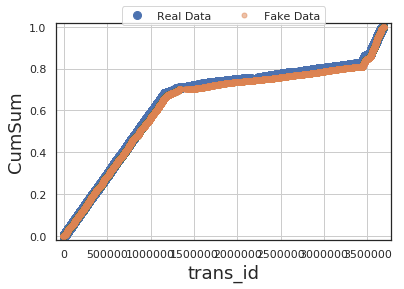

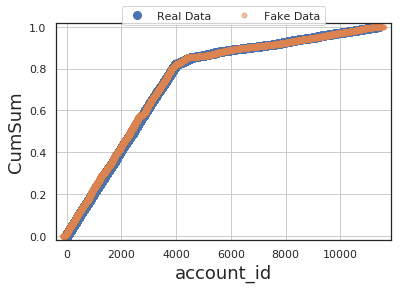

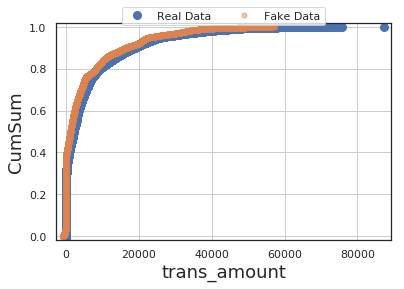

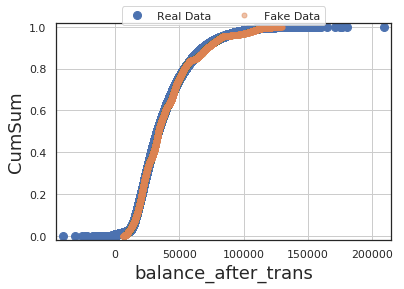

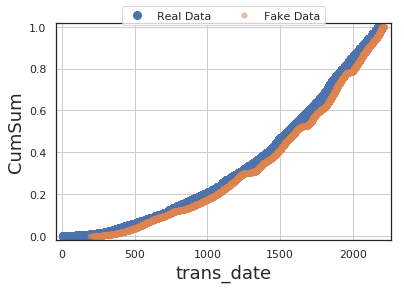

In [64]:
for col in fake._get_numeric_data().columns:
    r = real[col]
    f = fake.iloc[:, real.columns.tolist().index(col)]
    cdf(r, f, col, 'CumSum')
    plt.show()

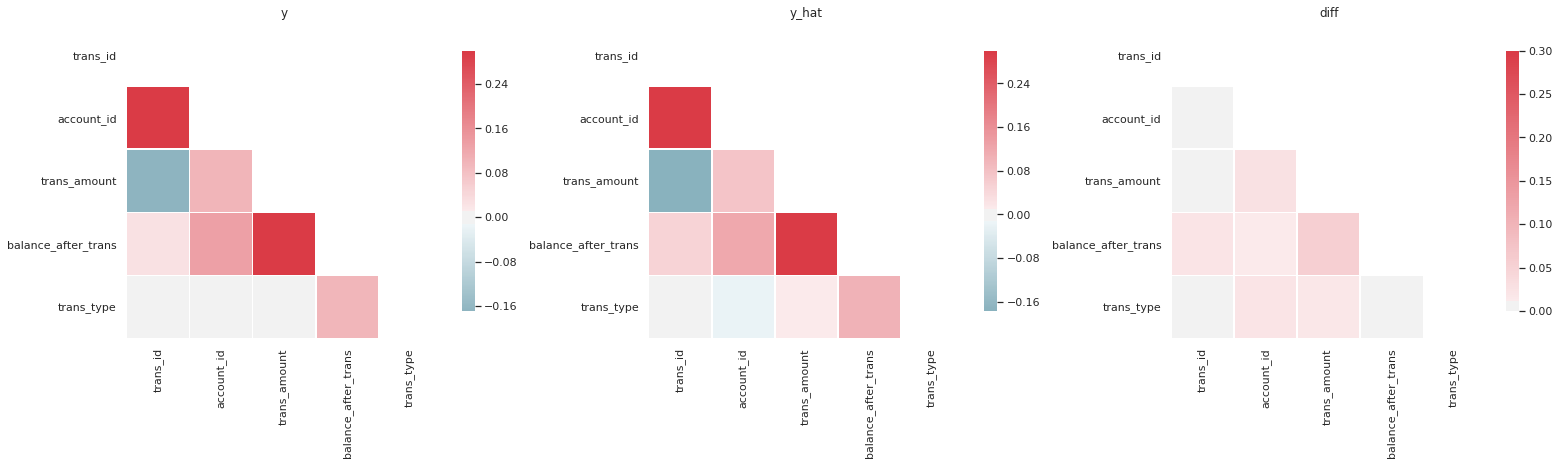

In [50]:
plot_em_all(real, fake)

In [54]:
for col in fake.select_dtypes(include=['object']):
    fake[col] = pd.factorize(fake[col])[0]
    real[col] = pd.factorize(real[col])[0]


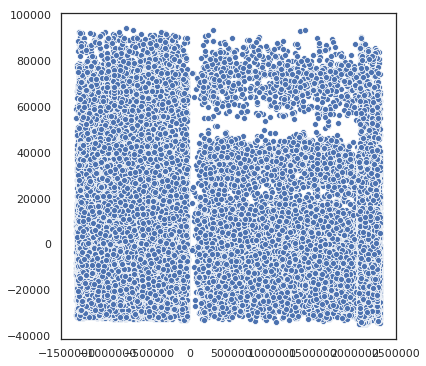

In [58]:
plot_dim_red(fake._get_numeric_data())

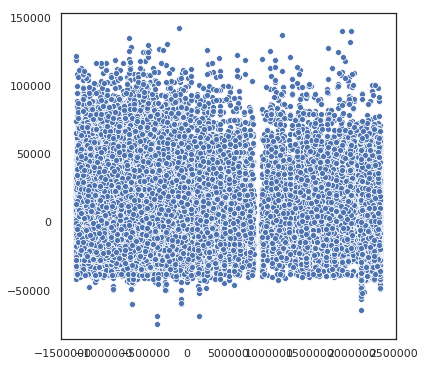

In [56]:
plot_dim_red(real._get_numeric_data())

In [22]:
real, fake = get_data('../data/berka/berka_cat.csv', 'samples/berka_sample_wgan_100.csv')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [23]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,624133,2091,7601.0,11070.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1760
1,171180,574,12276.0,61765.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,2076
2,511430,1715,8919.0,52761.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,993
3,317473,1064,20.0,102517.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,1531
4,486060,1629,1408.0,21460.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,733


In [24]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
905395,435062,1478,15043.0,58148.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,2008
891257,811903,2766,500.0,46849.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,1991
502775,179529,608,2895.0,8264.6,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1524
330746,841329,2864,21988.5,53167.2,CREDIT,CREDIT_IN_CASH,UNKNOWN,1253
874120,3568129,1135,169.5,42425.6,CREDIT,UNKNOWN,INTEREST_CREDITED,1976


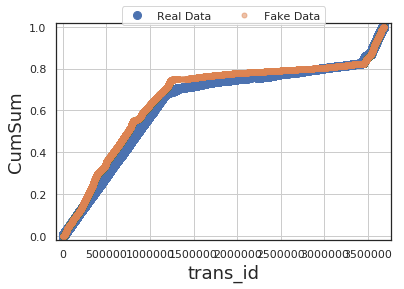

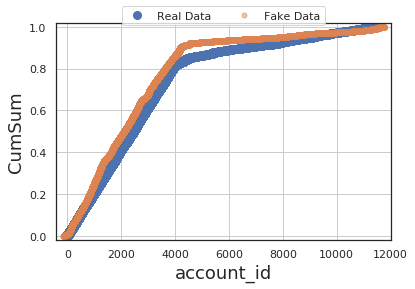

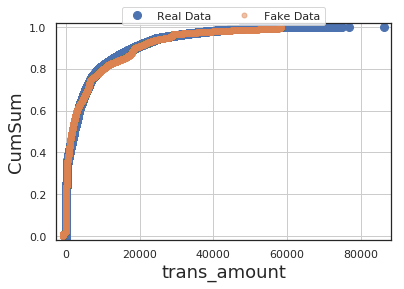

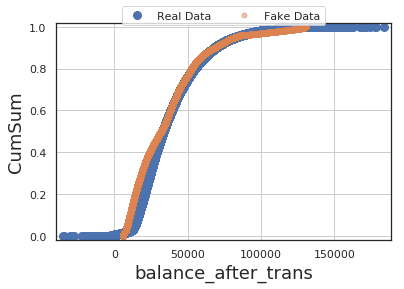

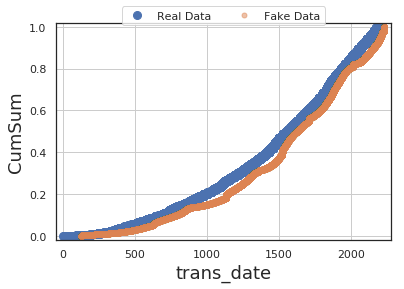

In [25]:
for col in fake._get_numeric_data().columns:
    r = real[col]
    f = fake.iloc[:, real.columns.tolist().index(col)]
    cdf(r, f, col, 'CumSum')
    plt.show()

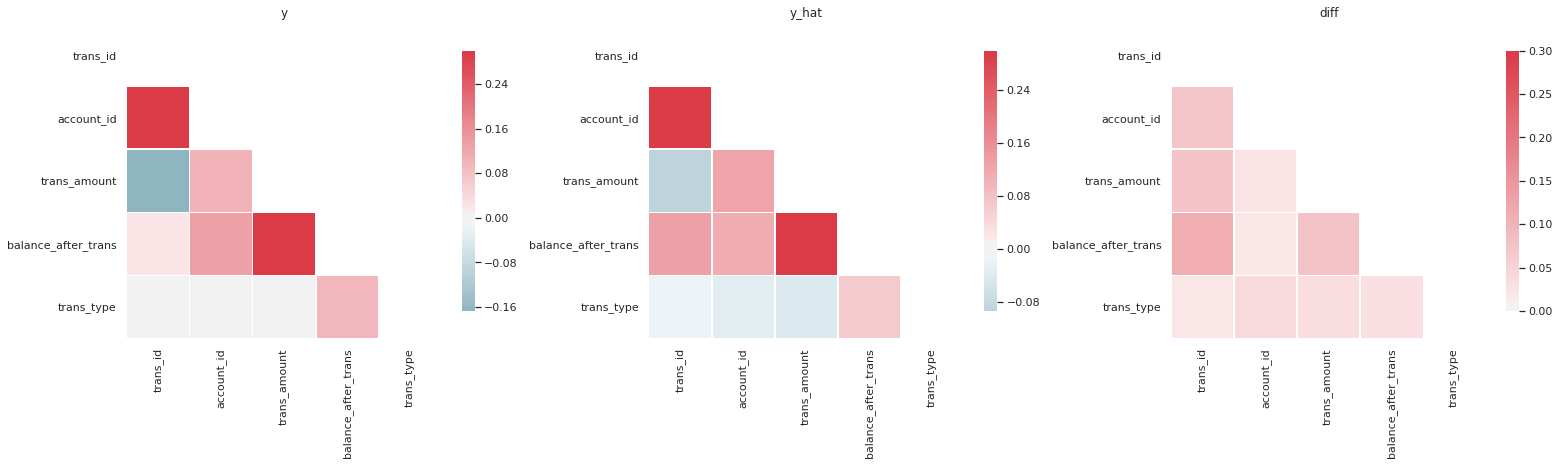

In [27]:
plot_em_all(real, fake)

In [28]:
for col in fake.select_dtypes(include=['object']):
    fake[col] = pd.factorize(fake[col])[0]
    real[col] = pd.factorize(real[col])[0]

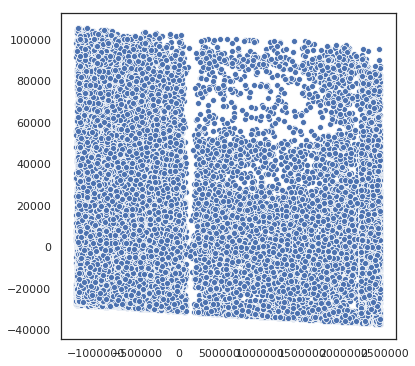

In [29]:
plot_dim_red(fake._get_numeric_data())

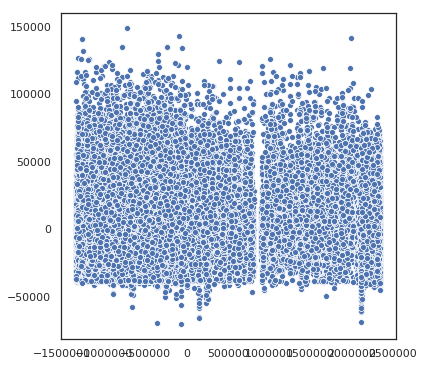

In [30]:
plot_dim_red(real._get_numeric_data())

In [31]:
real, fake = get_data('../data/berka/berka_cat.csv', 'samples/berka_sample_wgan.csv')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [32]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,1048474,3551,22850.0,52367.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1801
1,855223,2937,134.0,49950.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,853
2,823494,1449,4728.0,109960.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1801
3,1073680,3631,45237.0,100072.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,2064
4,1057643,2099,-938.0,31592.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1215


In [33]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
488860,568077,1934,1428.0,42397.1,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1502
543846,1091059,3729,3900.0,13496.4,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1583
278982,936775,3197,2008.0,20092.3,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1137
935886,756347,2581,4769.0,56554.2,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2045
886436,661287,2257,3374.0,21942.6,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1987


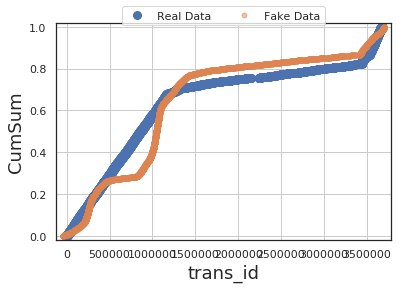

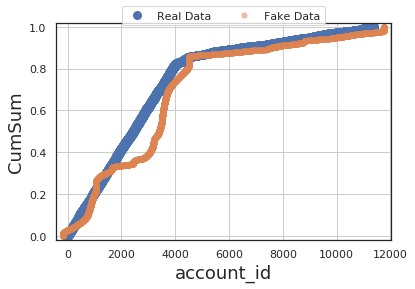

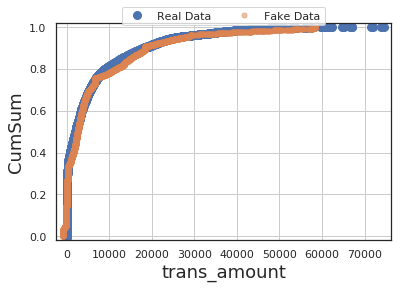

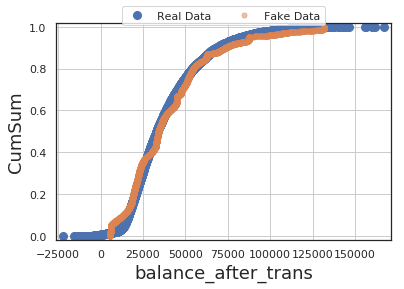

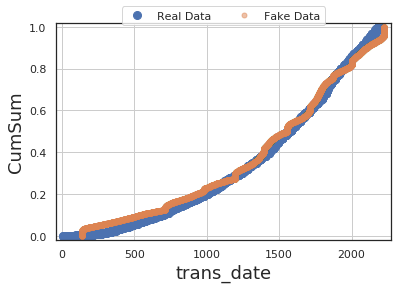

In [34]:
for col in fake._get_numeric_data().columns:
    r = real[col]
    f = fake.iloc[:, real.columns.tolist().index(col)]
    cdf(r, f, col, 'CumSum')
    plt.show()

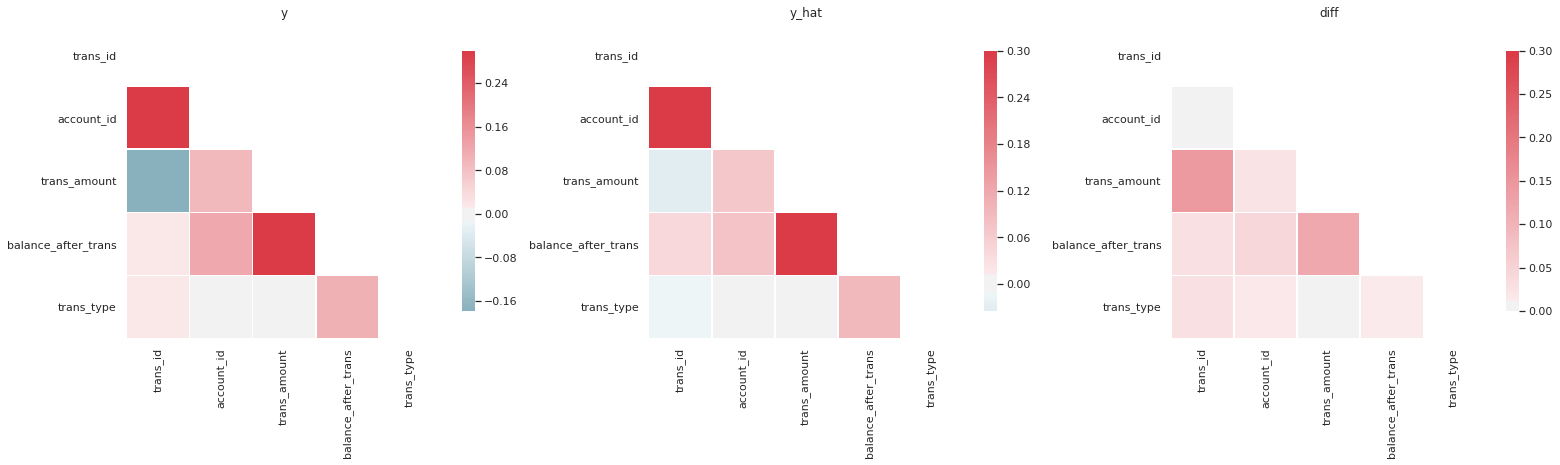

In [35]:
plot_em_all(real, fake)

In [36]:
for col in fake.select_dtypes(include=['object']):
    fake[col] = pd.factorize(fake[col])[0]
    real[col] = pd.factorize(real[col])[0]

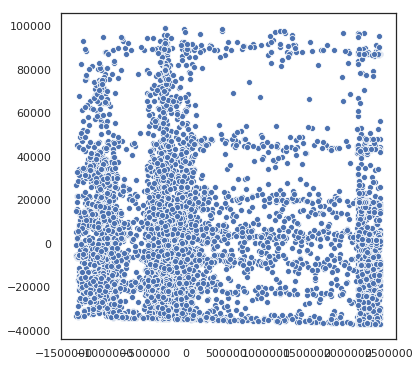

In [37]:
plot_dim_red(fake._get_numeric_data())

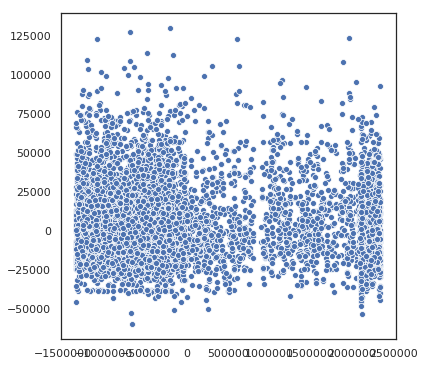

In [38]:
plot_dim_red(real._get_numeric_data())

# Tickets

In [4]:
def get_data(ds):
    real = {'num': pd.read_csv(f'../data/{ds}/{ds}.csv', sep=';'), 'cat': pd.read_csv(f'../data/{ds}/{ds}_cat.csv', sep=';')}
    real['cat'] = real['cat'][real['num'].columns.tolist()]
    fake = {'cat': pd.read_csv(f'samples/{ds}/{ds}_OI_11_00_fake_backtransformed.csv', sep=';'), 'num': pd.read_csv(f'samples/{ds}/{ds}_OI_11_00_fake.csv', sep=';')}
    assert len(real['num'].columns) == len(fake['num'].columns) == len(real['cat'].columns) == len(fake['cat'].columns), f'Number of columns doesnt match'
    return real, fake

In [17]:
real, fake = get_data('Ticket')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


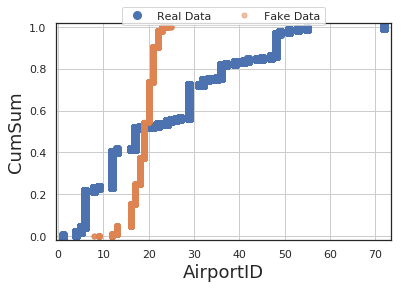

In [27]:
col = 'OriginStateFips'
r = real['num'][col]
f = fake['num'].iloc[:, real['num'].columns.tolist().index(col)]
cdf(r, f, 'AirportID', 'CumSum')

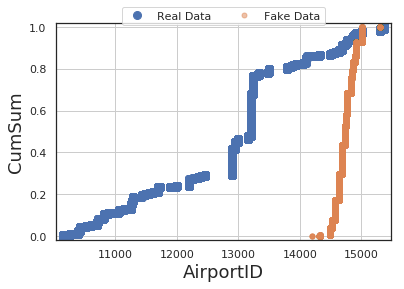

In [28]:
r = real['num'].DestAirportID
f = fake['num'].iloc[:, real['num'].columns.tolist().index('DestAirportID')]
cdf(r, f, 'AirportID', 'CumSum')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


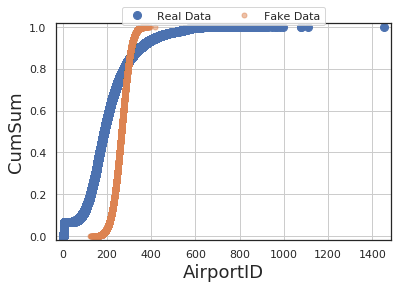

In [18]:
col = 'MktFare'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], 'AirportID', 'CumSum')

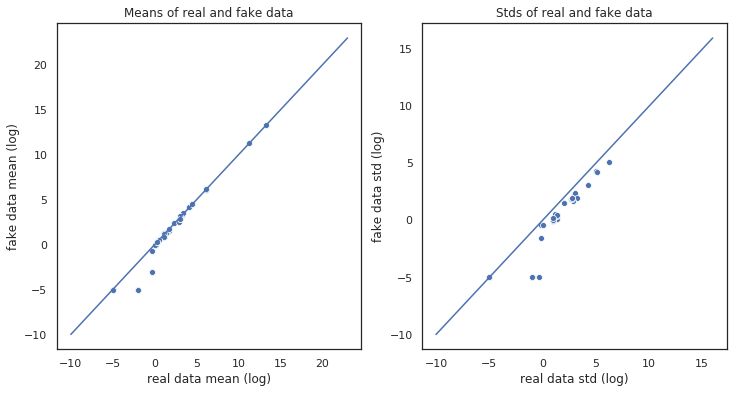

In [33]:
plot_stats(real, fake, which='num')

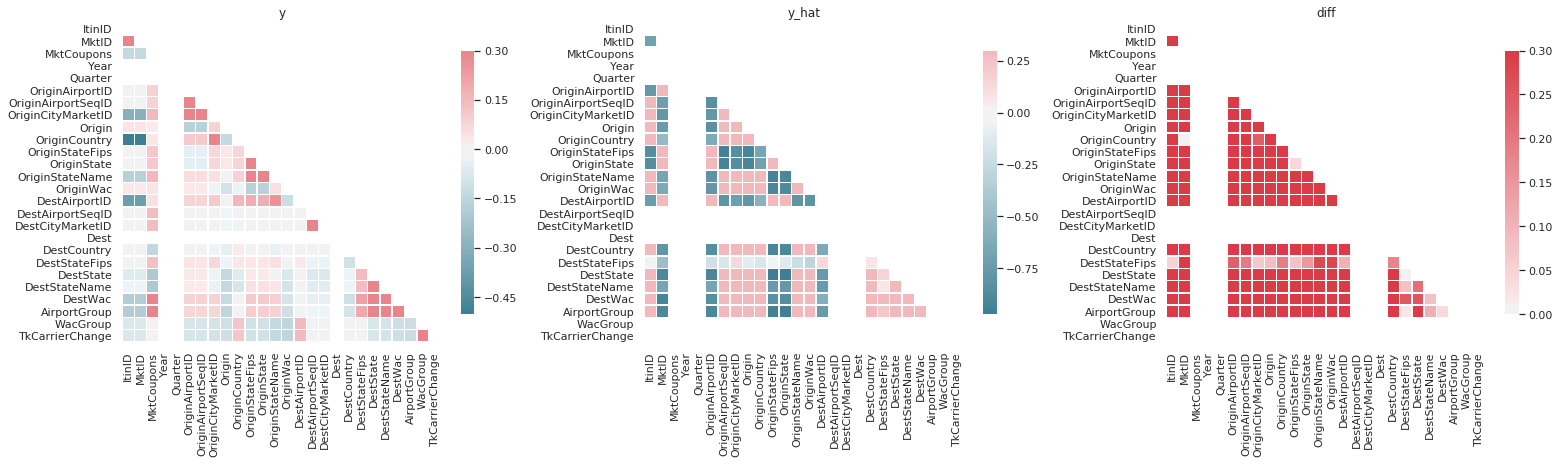

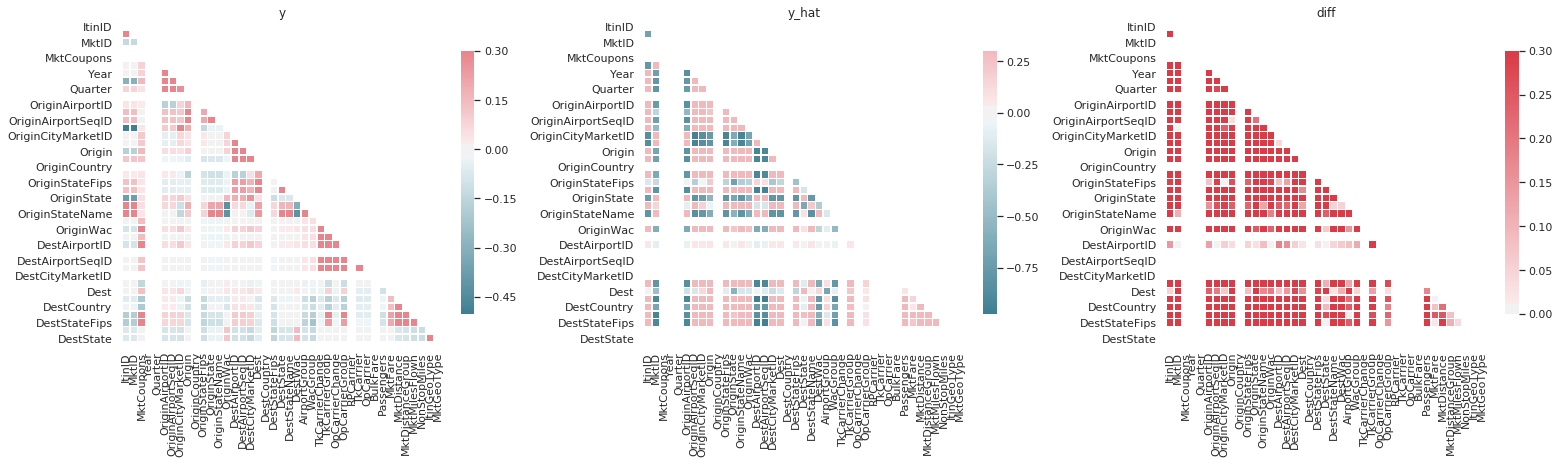

In [35]:
plot_em_all(real, [fake])

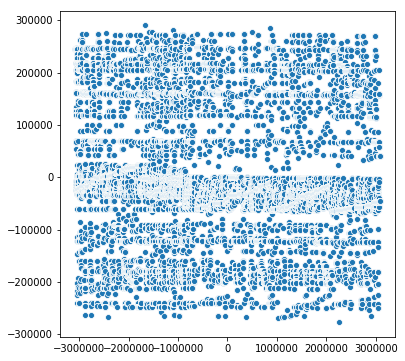

In [15]:
plot_dim_red(real['num'])

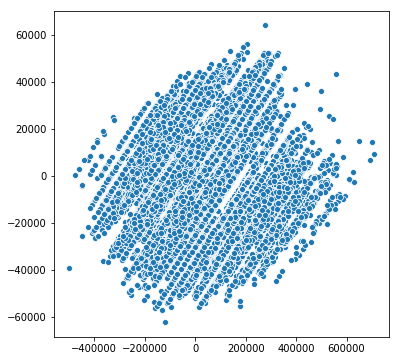

In [16]:
plot_dim_red(fake1['num'])

In [14]:
eucl_corr(real['num'], fake1['num'])

20.162619046708723

# Berka

In [51]:
real, fake = get_data('berka')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [52]:
len(real['num'])

1056320

In [39]:
for x in real.keys():
    real[x] = real[x][:round(len(real[x]) / 1000.0) * 1000]

In [21]:
fake['cat'].head()

,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_date
0,1166,9900,34221,CREDIT,COLLECTION_FROM_OTHER_BANK,559.0
1,1515,14404,45595,CREDIT,COLLECTION_FROM_OTHER_BANK,1340.0
2,3347,5358,16956,CREDIT,REMITTANCE_TO_OTHER_BANK,1967.0
3,5120,7258,22579,UNKNOWN,WITHDRAWAL_IN_CASH,1110.0
4,617,10353,34762,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,1999.0


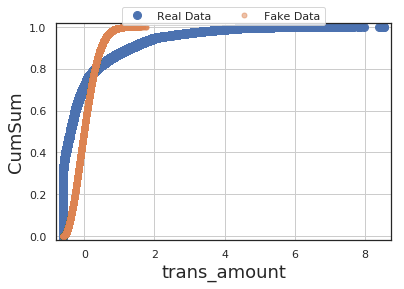

In [42]:
col = 'trans_amount'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], col, 'CumSum')

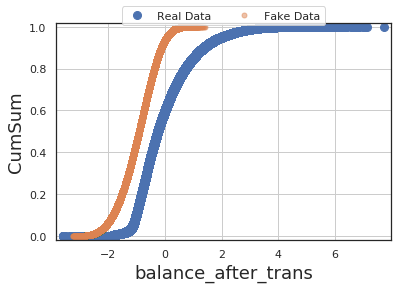

In [43]:
col = 'balance_after_trans'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], col, 'CumSum')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


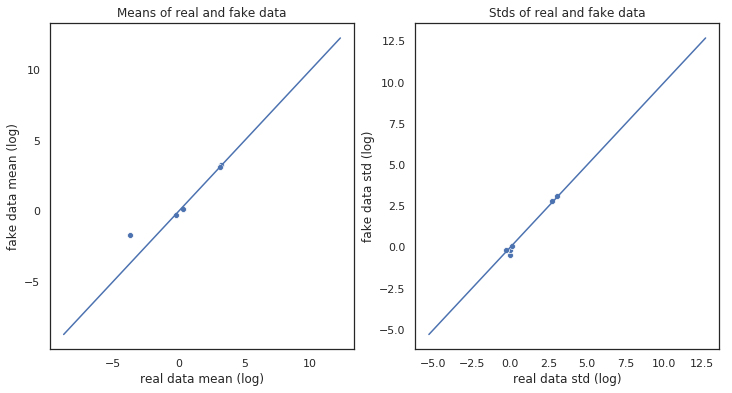

In [44]:
plot_stats(real, fake)

[[ 1.          0.09996145  0.1280243   0.00369982]
 [ 0.09996145  1.          0.45727409 -0.00488605]
 [ 0.1280243   0.45727409  1.          0.09689117]
 [ 0.00369982 -0.00488605  0.09689117  1.        ]]
[[ 1.          0.01136447  0.01225498  0.00596509]
 [ 0.01136447  1.          0.81013701  0.20137025]
 [ 0.01225498  0.81013701  1.         -0.04885212]
 [ 0.00596509  0.20137025 -0.04885212  1.        ]]
[[0.         0.08859698 0.11576932 0.00226526]
 [0.08859698 0.         0.35286292 0.20625631]
 [0.11576932 0.35286292 0.         0.14574329]
 [0.00226526 0.20625631 0.14574329 0.        ]]


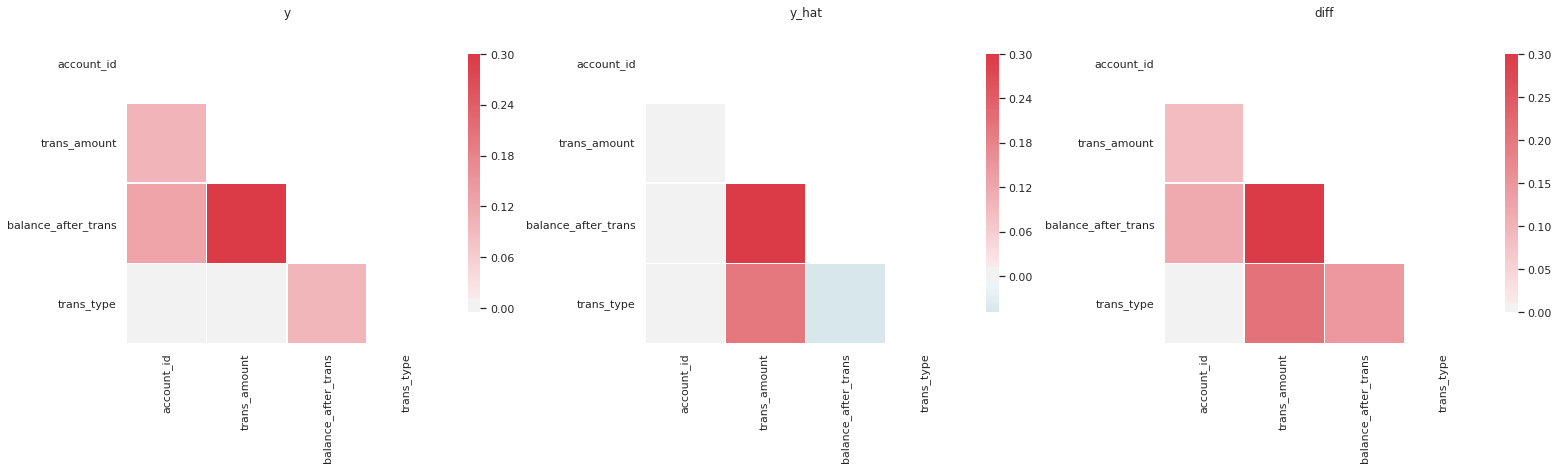

[[ 1.          0.01827771 -0.04199954 -0.02616205 -0.0178587   0.50693967]
 [ 0.01827771  1.          0.45727409 -0.13913725 -0.43907939 -0.00488605]
 [-0.04199954  0.45727409  1.         -0.08960648 -0.16166692  0.09689117]
 [-0.02616205 -0.13913725 -0.08960648  1.          0.41237358  0.02438907]
 [-0.0178587  -0.43907939 -0.16166692  0.41237358  1.          0.04990107]
 [ 0.50693967 -0.00488605  0.09689117  0.02438907  0.04990107  1.        ]]
[[ 1.          0.12885702 -0.10228091  0.12339779  0.07897068  0.65667228]
 [ 0.12885702  1.          0.81013339  0.18241268  0.10573955  0.20136834]
 [-0.10228091  0.81013339  1.          0.29056994  0.19313252 -0.04885354]
 [ 0.12339779  0.18241268  0.29056994  1.          0.20034711  0.21246972]
 [ 0.07897068  0.10573955  0.19313252  0.20034711  1.          0.04328861]
 [ 0.65667228  0.20136834 -0.04885354  0.21246972  0.04328861  1.        ]]
[[0.         0.11057931 0.06028138 0.14955984 0.09682938 0.14973261]
 [0.11057931 0.         0.352

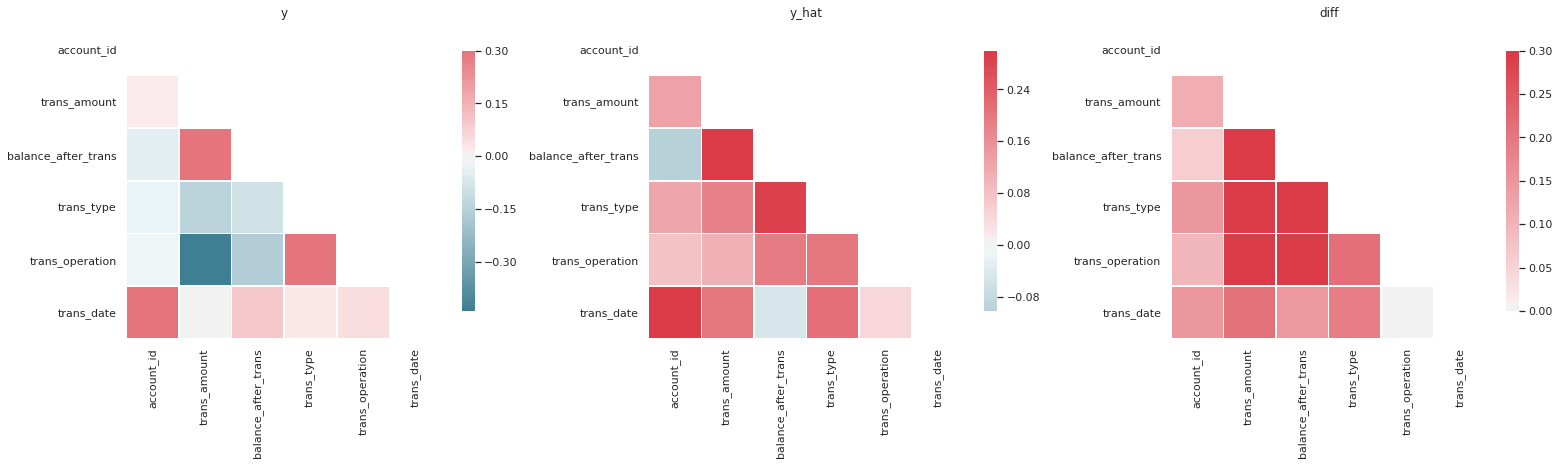

In [50]:
plot_em_all(real, fake)

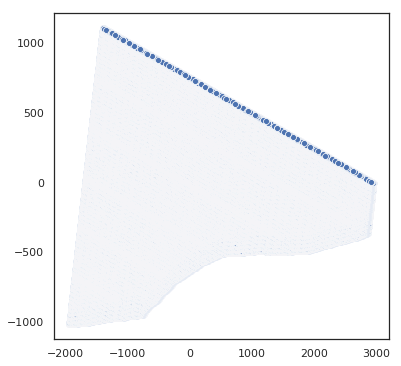

In [46]:
plot_dim_red(real['num'])

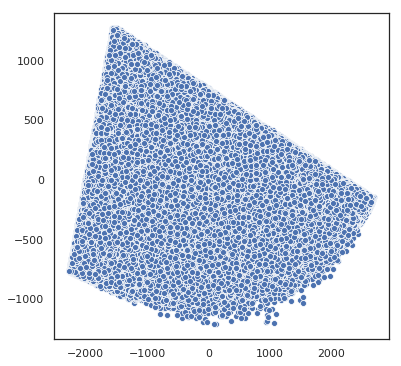

In [47]:
plot_dim_red(fake['num'])

In [15]:
real['cat'].sample(20).append(fake['cat'].sample(20)).sample(30).reset_index()

,index,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_date
0,271730,2489,14.6,16987.4,WITHDRAWAL,WITHDRAWAL_IN_CASH,1125.0
1,962379,10068,34145.0,53136.0,CREDIT,CREDIT_IN_CASH,2077.0
2,373467,2225,98.5,24269.1,CREDIT,UNKNOWN,1338.0
3,427109,9138,216.1,51856.4,CREDIT,UNKNOWN,1429.0
4,984893,9472,6660.0,19643.0,CREDIT,CREDIT_IN_CASH,970.0
5,99842,3035,316.5,75100.5,CREDIT,UNKNOWN,668.0
6,759176,1281,700.0,54230.9,WITHDRAWAL,WITHDRAWAL_IN_CASH,1844.0
7,747445,688,6309.0,15996.0,CREDIT,COLLECTION_FROM_OTHER_BANK,1858.0
8,542199,1904,7531.0,19981.0,CREDIT,COLLECTION_FROM_OTHER_BANK,1755.0
9,726153,136,14.6,14763.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,1825.0


# Paysim

In [1]:
real, fake = get_data('paysim')

NameError: name 'get_data' is not defined

In [ ]:
plot_stats(real, fake)

In [ ]:
plot_em_all(real, fake)

In [ ]:
plot_dim_red(real['num'])

In [ ]:
plot_dim_red(fake['num'])

In [54]:
num = pd.read_csv('../data/paysim/paysim.csv', sep=';')
cat = pd.read_csv('../data/paysim/paysim_cat.csv')

In [58]:
cat = pd.read_csv('../data/paysim/paysim_cat.csv')

In [59]:
cat.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
